In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("DNABIND.csv")
true_labels = df['true_label']
predicted_labels = df['predicted_label']

# 1. Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=df['true_label'].unique())
print("Confusion Matrix:")
print(cm)

# 2. Metrics: Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', pos_label=1)
recall = recall_score(true_labels, predicted_labels, average='binary', pos_label=1)        # Sensitivity/Recall
specificity = recall_score(true_labels, predicted_labels, average='binary', pos_label=0)   # Specificity
f1 = f1_score(true_labels, predicted_labels, average='binary', pos_label=1)

print(f"\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

# 3. Classification Report (Detailed per-class breakdown)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# 4. Bias Analysis
# Calculate per-class accuracy
class_accuracy = {}
for label in df['true_label'].unique():
    label_true = true_labels == label
    label_pred = predicted_labels == label
    class_accuracy[label] = accuracy_score(label_true, label_pred)

print("\nPer-Class Accuracy:")
for label, acc in class_accuracy.items():
    print(f"Class {label}: {acc:.2f}")

# Analyze imbalance (bias) in predictions
class_distribution = predicted_labels.value_counts(normalize=True)
print("\nClass Distribution in Predictions:")
print(class_distribution)


Confusion Matrix:
[[ 44   5]
 [101  87]]

Metrics:
Accuracy: 0.55
Precision: 0.30
Recall/Sensitivity: 0.90
Specificity: 0.46
F1-Score: 0.45

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       188
           1       0.30      0.90      0.45        49

    accuracy                           0.55       237
   macro avg       0.62      0.68      0.54       237
weighted avg       0.81      0.55      0.59       237


Per-Class Accuracy:
Class 1: 0.55
Class 0: 0.55

Class Distribution in Predictions:
predicted_label
1    0.611814
0    0.388186
Name: proportion, dtype: float64


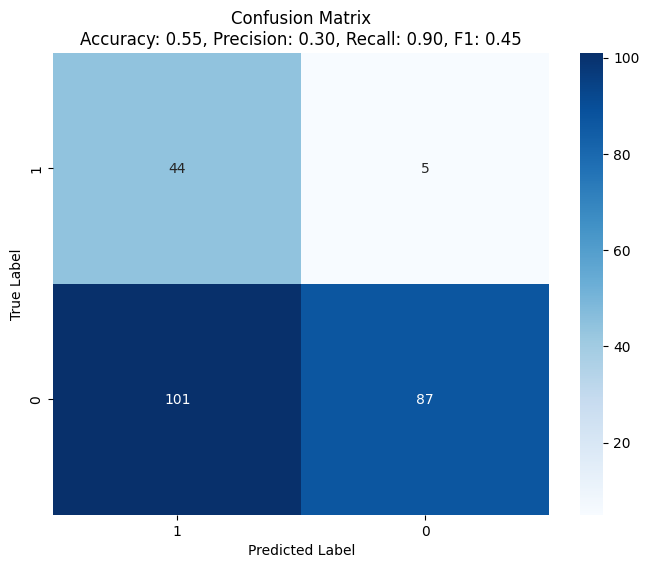

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['true_label'].unique(), yticklabels=df['true_label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')
plt.show()

<ipython-input-6-d6ae947adca4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


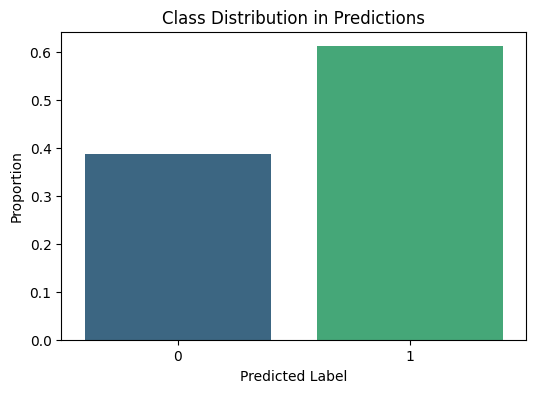

In [ ]:
class_distribution = predicted_labels.value_counts(normalize=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Proportion')
plt.title('Class Distribution in Predictions')
plt.show()